In [83]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

As you may have noticed in the data we plotted previously, there was a lot of data that appeared to not be weather. 

In this next part, you will learn methods to hide or 'mask out' the non-meteorological data.

First, lets read in a data file, get a list of the variables, and plot reflectivity.

In [84]:
ppi = xr.open_dataset('houcsapr2cfrqcS2.b1/houcsapr2cfrqcS2.b1.20220701.192603.nc', decode_times = False)
ppi['time'] = pd.to_datetime(ppi['base_time'].values + ppi['time_offset'].values, unit='s')

In [85]:
list(ppi.variables.keys())

['base_time',
 'time_offset',
 'time',
 'attenuation_corrected_differential_reflectivity',
 'attenuation_corrected_differential_reflectivity_lag_1',
 'attenuation_corrected_reflectivity_h',
 'censor_mask',
 'classification_mask',
 'copol_correlation_coeff',
 'differential_phase',
 'differential_reflectivity',
 'differential_reflectivity_lag_1',
 'mean_doppler_velocity',
 'mean_doppler_velocity_v',
 'normalized_coherent_power',
 'normalized_coherent_power_v',
 'reflectivity',
 'reflectivity_v',
 'signal_to_noise_ratio_copolar_h',
 'signal_to_noise_ratio_copolar_v',
 'specific_attenuation',
 'specific_differential_attenuation',
 'specific_differential_phase',
 'spectral_width',
 'spectral_width_v',
 'uncorrected_copol_correlation_coeff',
 'uncorrected_differential_phase',
 'uncorrected_differential_reflectivity',
 'uncorrected_differential_reflectivity_lag_1',
 'uncorrected_mean_doppler_velocity_h',
 'uncorrected_mean_doppler_velocity_v',
 'uncorrected_reflectivity_h',
 'uncorrected_refl

/tmp/ipykernel_984/2259817042.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


Text(0.5, 1.0, 'Elevation: 1.527100')

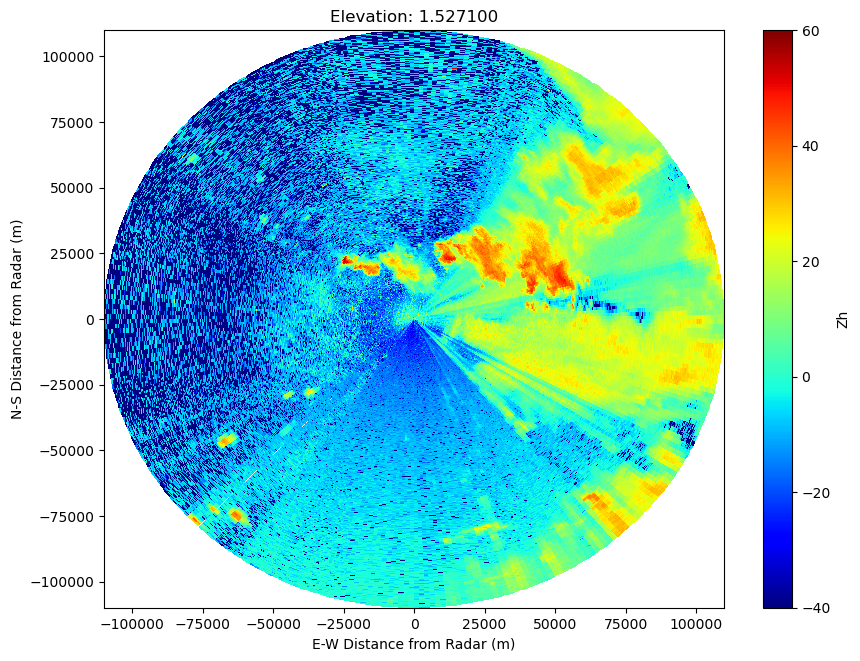

In [86]:
sweep_start = list(map(int,(ppi['sweep_start_ray_index'].data)))
sweep_end = list(map(int,(ppi['sweep_end_ray_index'].data)))
azi = ppi['azimuth'].data
elv = ppi['elevation'].data
r = ppi['range'].data

y = np.outer(r, np.cos((azi)*np.pi/180.0))
x = np.outer(r, np.sin((azi)*np.pi/180.0))
sweep_num = 0


sweep_num = 1
#     print(sweep_num)
plt.figure(figsize=(10,7.5))

plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                ppi['reflectivity'].data[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=-40, vmax=60, cmap='jet')
clb = plt.colorbar()
clb.set_label('Zh')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Elevation: %f' % elv_start)

# Masking

One variable we often use to find the meteorological signal is Signal to Noise Ratio, as when this is higher there is less noise in the return.

/tmp/ipykernel_984/1710562499.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


Text(0.5, 1.0, 'Elevation: 1.527100')

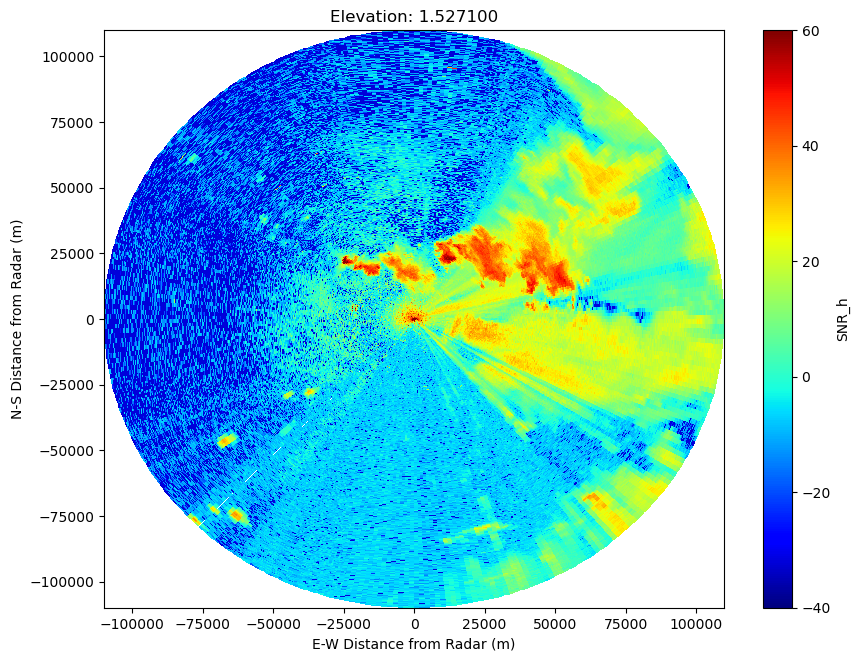

In [5]:
plt.figure(figsize=(10,7.5))

plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                ppi['signal_to_noise_ratio_copolar_h'].data[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=-40, vmax=60, cmap='jet')
clb = plt.colorbar()
clb.set_label('SNR_h')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Elevation: %f' % elv_start)

Let's also take a look at the noise floor using a histogram.

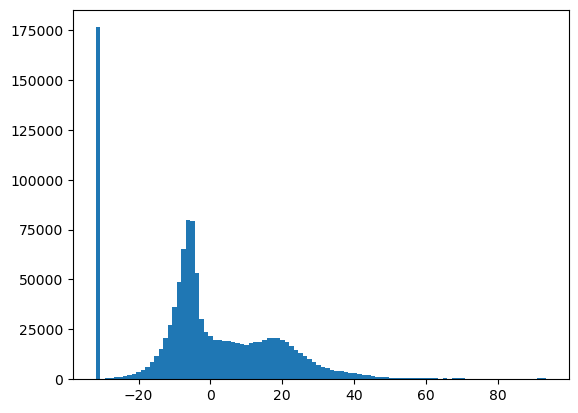

In [6]:
plt.hist(ppi['signal_to_noise_ratio_copolar_h'].data.flatten(), bins=100);

Based on these plots, what do you think would be a good SNR value to start with as our threshold?

In [22]:
snr_thres = 0

In [23]:
mask_snr = np.zeros_like(ppi['signal_to_noise_ratio_copolar_h'].data)

In [24]:
mask_snr[ppi['signal_to_noise_ratio_copolar_h'].data > snr_thres] = True

In [25]:
mask_snr

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)

/tmp/ipykernel_984/87245937.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


Text(0.5, 1.0, 'Elevation: 1.527100')

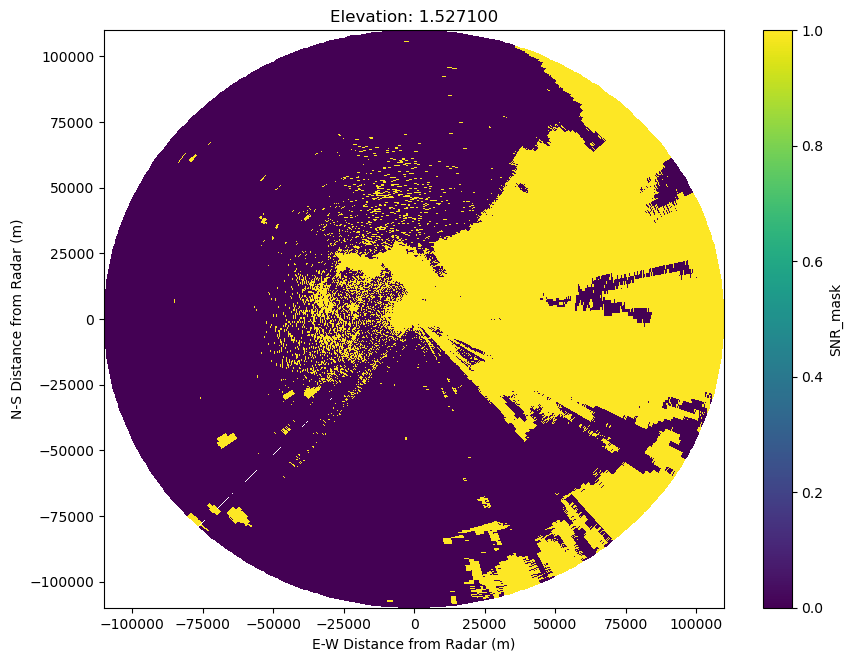

In [27]:
plt.figure(figsize=(10,7.5))

plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                mask_snr[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=0, vmax=1)
clb = plt.colorbar()
clb.set_label('SNR_mask')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Elevation: %f' % elv_start)

As you can see, this only removes the true noise values from the data, but not all the returns that are non-meteorological. Let's go back and edit the above threshold to be higher. 

One issue with an SNR mask, and many masking methods in general, is that you have to balance removing background with not removing too much cloud. If you make the SNR threshold too high, then you can cut off the edges of the cloud. It all depends on what you are interested in for your research.

Let's plot RhoHV next and see if it can help us filter the data. 


When working with new variables, it can be helpful to print the minumum and maximum values so you know what to set as your plot mins and maxes.

In [28]:
np.nanmin(ppi['copol_correlation_coeff'])

0.00015258789

In [29]:
np.nanmax(ppi['copol_correlation_coeff'])

0.9998474

/tmp/ipykernel_984/2244411496.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


Text(0.5, 1.0, 'Elevation: 1.527100')

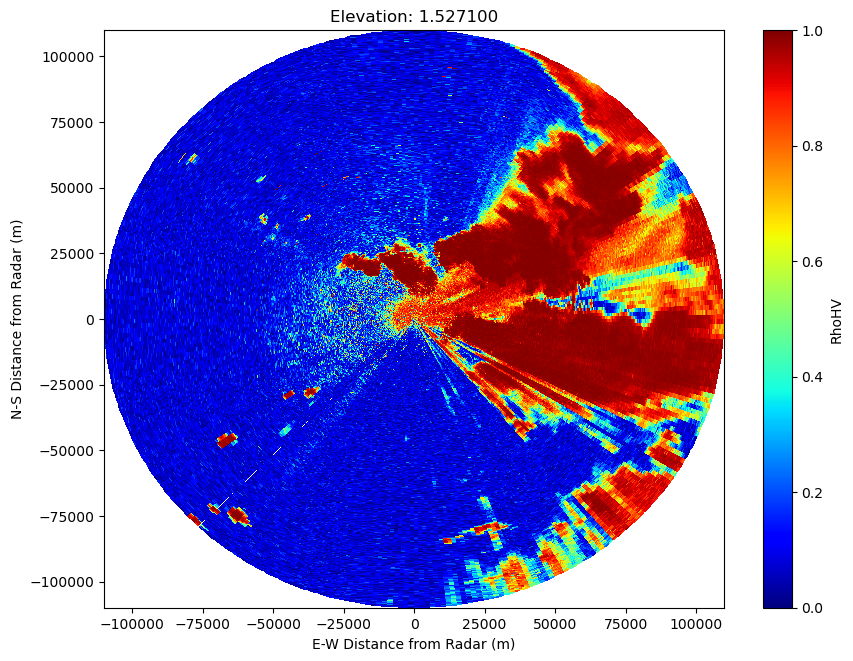

In [30]:
plt.figure(figsize=(10,7.5))

plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                ppi['copol_correlation_coeff'].data[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=0, vmax=1, cmap='jet')
clb = plt.colorbar()
clb.set_label('RhoHV')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Elevation: %f' % elv_start)

A RhoHV value for a metorological signal should be close to 1, as it is the correlation between the H and V returns. A rougher surface (like the ground, or a bird) will have a lower RhoHV value.

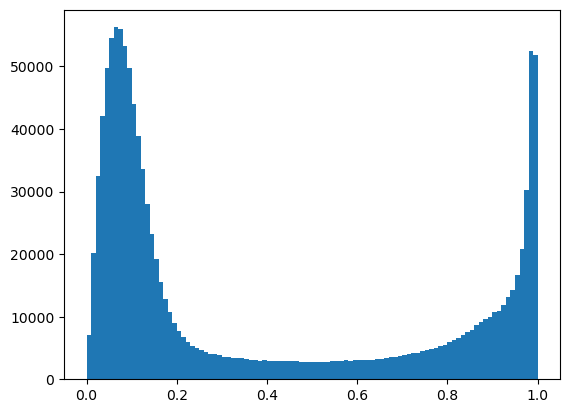

In [31]:
plt.hist(ppi['copol_correlation_coeff'].data.flatten(), bins=100);

Let's filter with a threshold of 0.95 to see how that looks, and we can increase that if we would like.

In [32]:
rhohv_thres = 0.95

In [33]:
mask_rhohv = np.zeros_like(ppi['copol_correlation_coeff'])

In [34]:
mask_rhohv[ppi['copol_correlation_coeff'].data > rhohv_thres] = True

/tmp/ipykernel_984/648041973.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


Text(0.5, 1.0, 'Elevation: 1.527100')

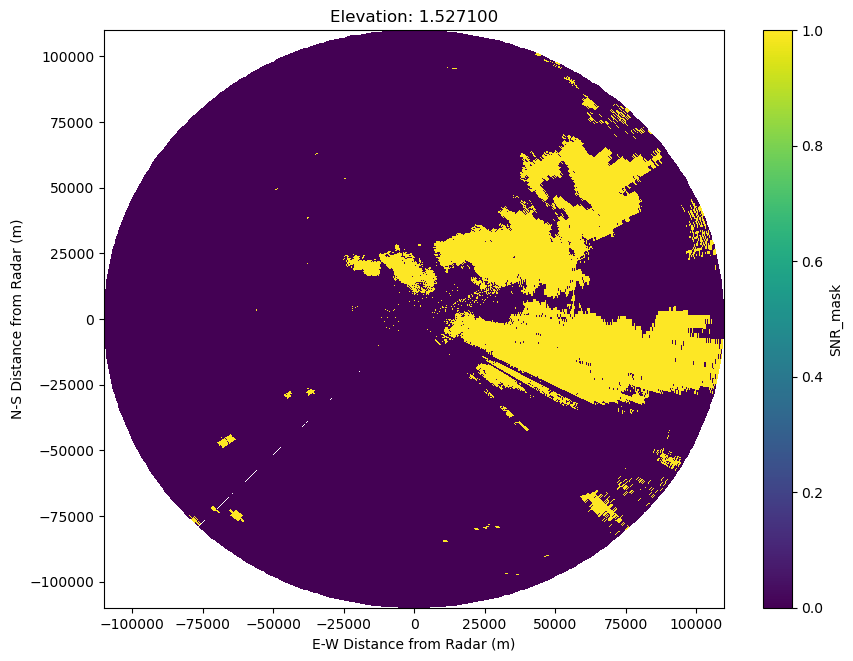

In [35]:
plt.figure(figsize=(10,7.5))

plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                mask_rhohv[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=0, vmax=1)
clb = plt.colorbar()
clb.set_label('SNR_mask')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Elevation: %f' % elv_start)

Wow! This filters out much more than the SNR mask did! What happens when we combine them?

In [36]:
mask_all = np.logical_and(mask_snr, mask_rhohv)

/tmp/ipykernel_984/4016621084.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
/tmp/ipykernel_984/4016621084.py:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
/tmp/ipykernel_984/4016621084.py:29: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  

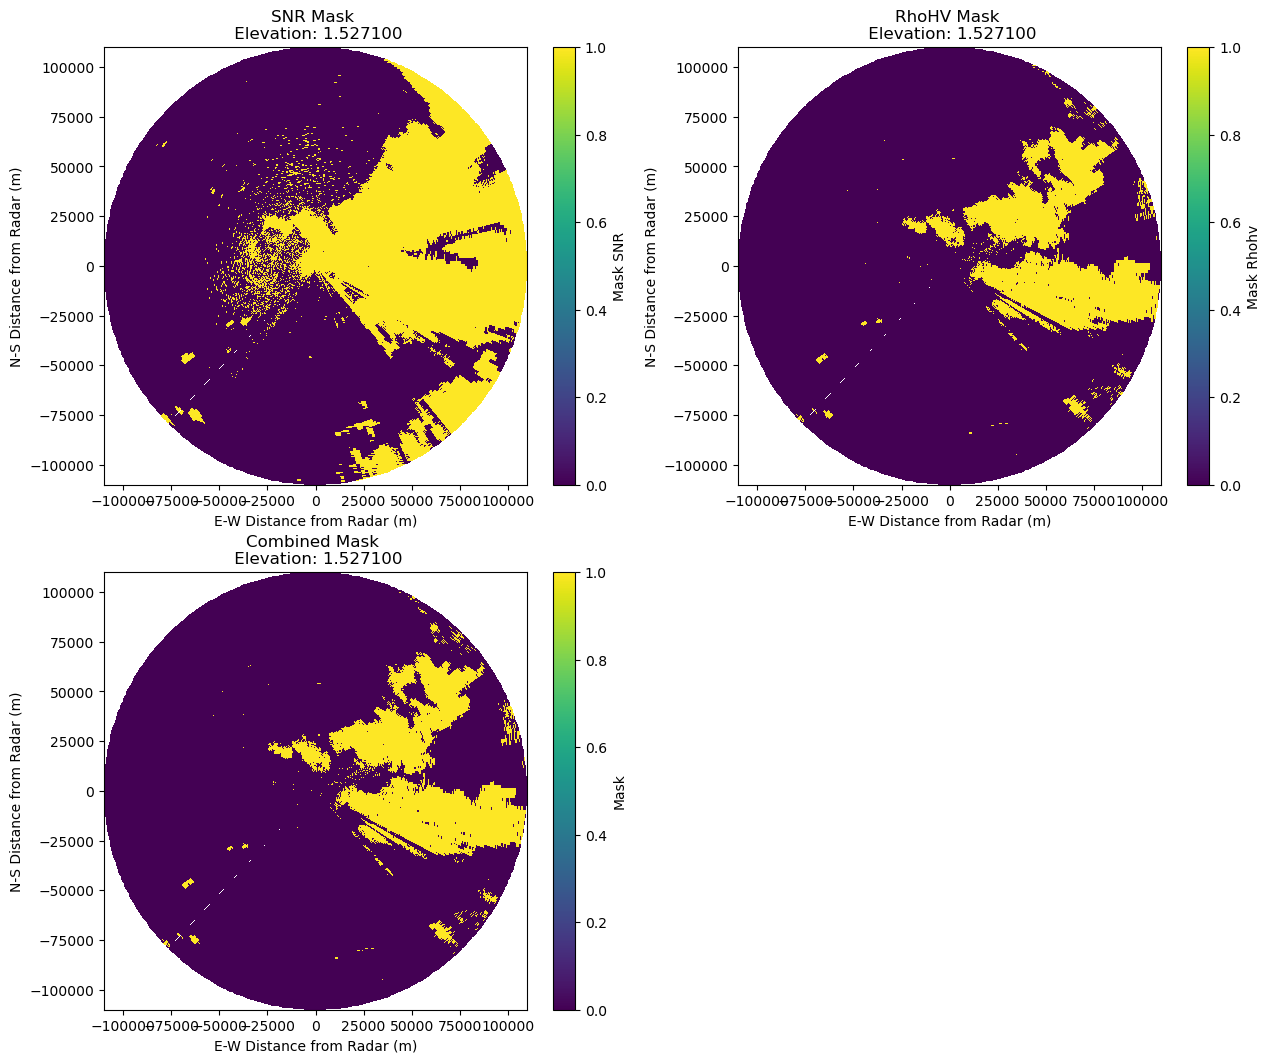

In [37]:
plt.figure(figsize=[15,12.5])

plt.subplot(221)

plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                mask_snr[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=0, vmax=1)
clb = plt.colorbar()
clb.set_label('Mask SNR')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('SNR Mask \n Elevation: %f' % elv_start)

plt.subplot(222)
plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                mask_rhohv[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=0, vmax=1)
clb = plt.colorbar()
clb.set_label('Mask Rhohv')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('RhoHV Mask \n Elevation: %f' % elv_start)

plt.subplot(223)
plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                mask_all[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=0, vmax=1)
clb = plt.colorbar()
clb.set_label('Mask')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Combined Mask \n Elevation: %f' % elv_start);

So, what does this look like when applied to the reflectivity?

In [38]:
z_masked = np.ma.masked_where(mask_all == False, ppi['reflectivity'])

/tmp/ipykernel_984/2920529153.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
/tmp/ipykernel_984/2920529153.py:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


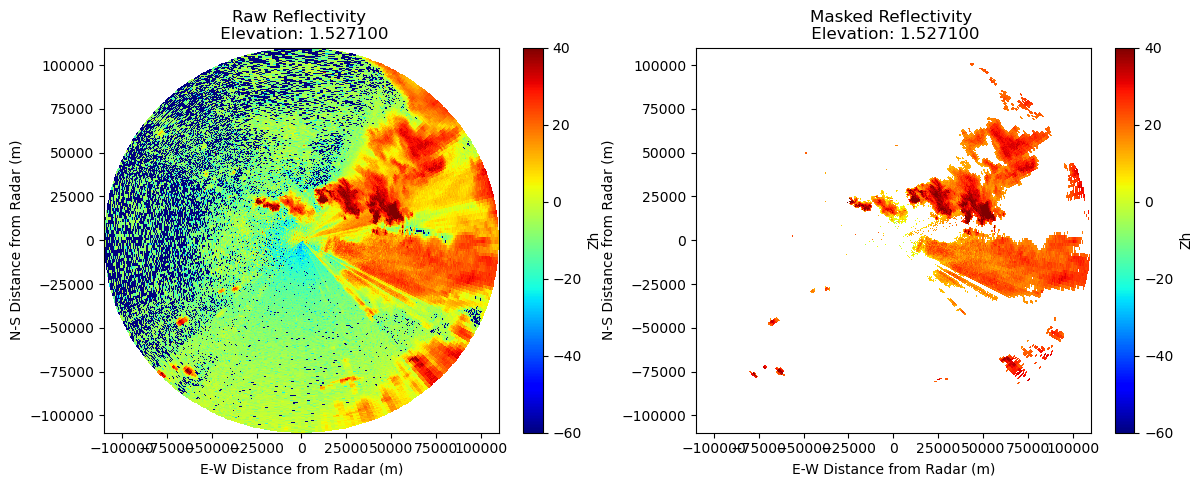

In [39]:
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                ppi['reflectivity'].data[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=-60, vmax=40, cmap='jet')
clb = plt.colorbar()
clb.set_label('Zh')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Raw Reflectivity \n Elevation: %f' % elv_start)


plt.subplot(122)
plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                z_masked[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=-60, vmax=40, cmap='jet')
clb = plt.colorbar()
clb.set_label('Zh')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Masked Reflectivity \n Elevation: %f' % elv_start);

As you can see, this removes a good portion of the non-meteorological echo, but not all! There are still some extra features present, both likely clutter signals and possible second trip echos (an echo from a given pulse that is not received until after the transmission of the next pulse) 



# Exercise
1. Are there any additional variables you think could be included in the mask? Test them out!

2. Will the full mask you came up with work for the X and Ka bands as well? Or will the numbers we used here need to be modified? Test this on them!

In [131]:
ppi = xr.open_dataset('houxsacrcfrqcM1.b1/houxsacrcfrqcM1.b1.20220701.195929.nc', decode_times = False)
# ppi = xr.open_dataset('houkasacrcfrqcM1.b1/houkasacrcfrqcM1.b1.20220910.195617.nc', decode_times = False)

In [132]:
ppi.scan_name

'ppiv'

In [133]:
rhohv_thres = 0.95
mask_rhohv = np.zeros_like(ppi['copol_correlation_coeff'])
mask_rhohv[ppi['copol_correlation_coeff'].data > rhohv_thres] = True

snr_thres = 0
mask_snr = np.zeros_like(ppi['signal_to_noise_ratio_copolar_h'].data)
mask_snr[ppi['signal_to_noise_ratio_copolar_h'].data > snr_thres] = True

mask_all = np.logical_and(mask_snr, mask_rhohv)
z_masked = np.ma.masked_where(mask_all == False, ppi['reflectivity'])

/tmp/ipykernel_984/4020410493.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
/tmp/ipykernel_984/4020410493.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,


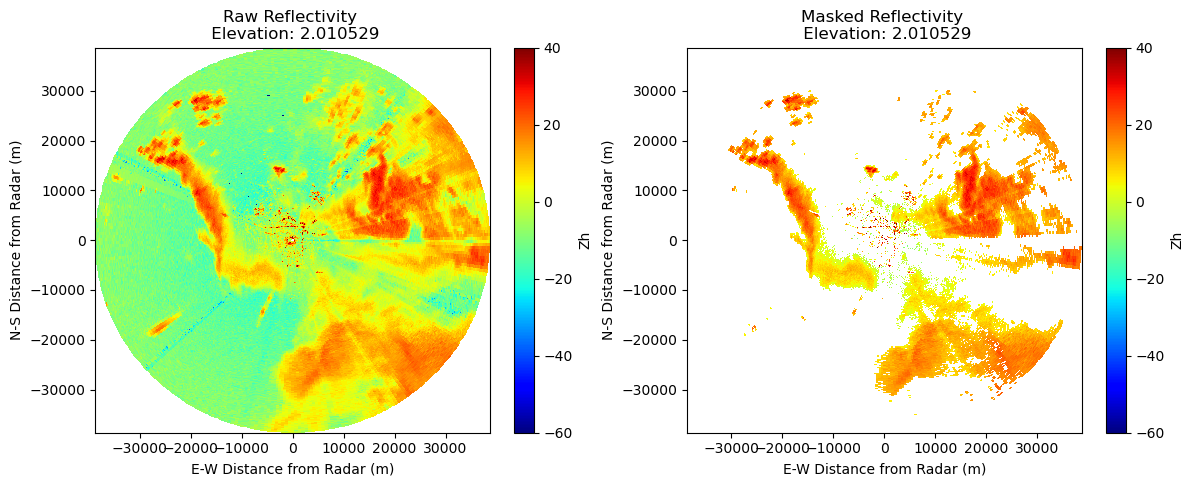

In [134]:
sweep_start = list(map(int,(ppi['sweep_start_ray_index'].data)))
sweep_end = list(map(int,(ppi['sweep_end_ray_index'].data)))

y = np.outer(r, np.cos((azi)*np.pi/180.0))
x = np.outer(r, np.sin((azi)*np.pi/180.0))
sweep_num = 0

azi = ppi['azimuth'].data
elv = ppi['elevation'].data
r = ppi['range'].data

plt.figure(figsize=(14,5))

plt.subplot(121)
plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                ppi['reflectivity'].data[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=-60, vmax=40, cmap='jet')
clb = plt.colorbar()
clb.set_label('Zh')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Raw Reflectivity \n Elevation: %f' % elv_start)


plt.subplot(122)
plt.pcolormesh(x[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                y[:,sweep_start[sweep_num]:sweep_end[sweep_num]].T,
                z_masked[sweep_start[sweep_num]:sweep_end[sweep_num],:], 
                vmin=-60, vmax=40, cmap='jet')
clb = plt.colorbar()
clb.set_label('Zh')
plt.xlabel('E-W Distance from Radar (m)')
plt.ylabel('N-S Distance from Radar (m)')
elv_start = elv[sweep_start[sweep_num]+50]
plt.title('Masked Reflectivity \n Elevation: %f' % elv_start);